![header](../figures/logos_partenaires._cmems_se.jpg)

# Benchmark SWOT Swath Filtering

<div style="text-align: right"><i> 2022-08-24 CNN_BENCHMARK_DEMO </i></div>

***
**Authors:**  CLS & Datlas <br>
**Copyright:** 2022 CLS & Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Benchmark of CNN filter</center></h1></div>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***


<div class="alert alert-danger" role="alert">

<h3>Learning outcomes</h3>

At the end of this notebook you will know:
<ul>
  <li>How you can display unfiltered, filtered SWOT Level3 SSH products.</li>
  <li>How you can evaluate the cnn filter: statistical and spectral analysis.</li>
</ul>
    
</div>



In [1]:
import os
import glob
import sys
sys.path.append('..')
from src.benchmark import *
from src.plot import *
from src.swot import *

In [2]:
import sys
sys.executable

'/home/metrefs/anaconda3/envs/env-dc-swot-filtering/bin/python'

<div class="alert alert-info" role="alert">

<h2>1. Input files to analyse</h2>

</div>

In [3]:
list_of_file_inputs = sorted(glob.glob('../dc_inputs/input_ssh_karin_013*.nc'))

In [4]:
list_of_file = sorted(glob.glob('../inputs/eNATL60-BLB002/cnn/SWOT_L2_LR_Filtered_013*.nc'))

<div class="alert alert-info" role="alert">

<h2>2. Illustration on one pass (same as quickstart example)</h2>

</div>

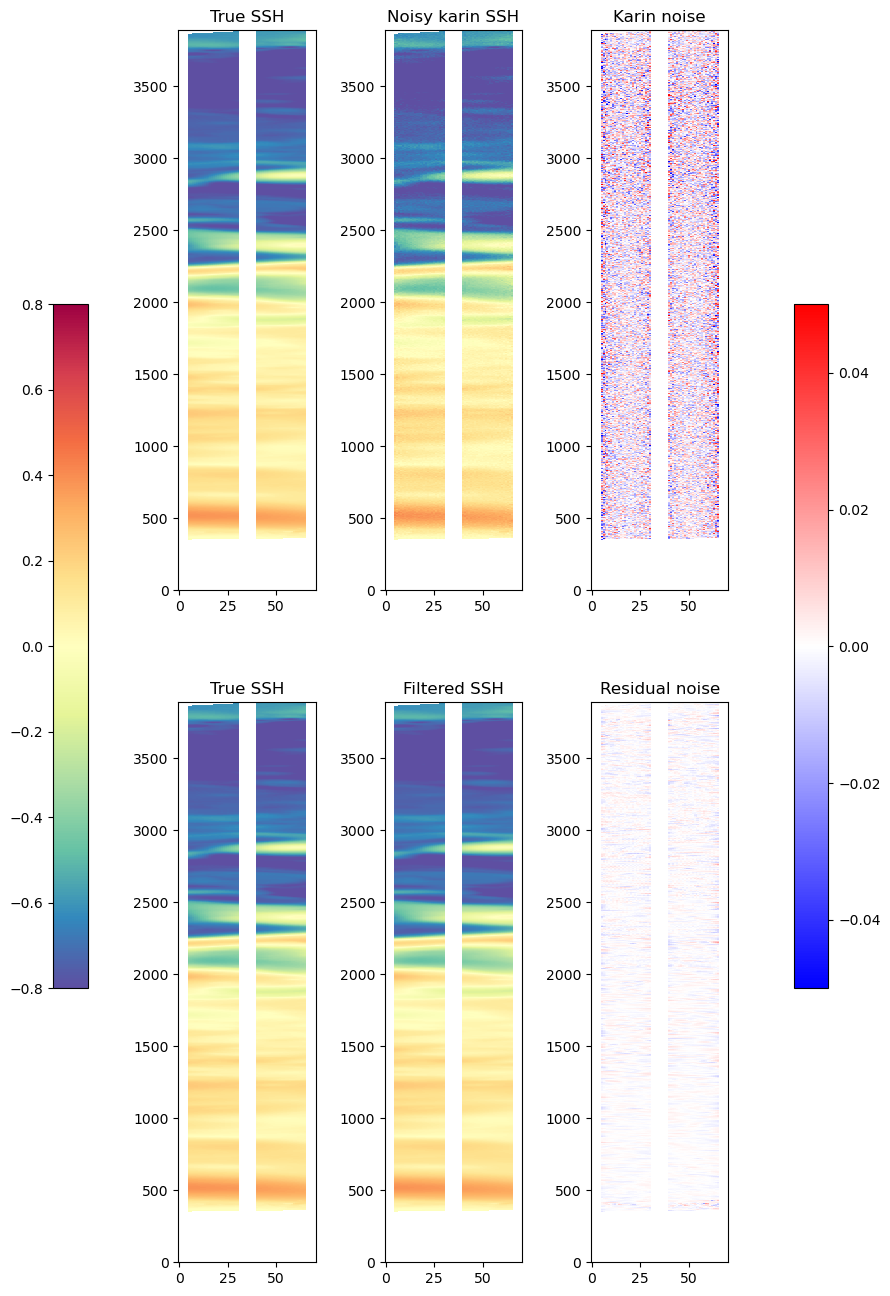

In [5]:

swt_input = SwotTrack(list_of_file_inputs[3])  
swt_filtered = SwotTrack(list_of_file[3]) 

n_p, n_l = np.meshgrid(swt_input._dset.num_pixels.values,swt_input._dset.num_lines.values)
fig, axs = plt.subplots(2, 3,figsize=(10,16))
row,col = 0,0
ax = axs[row,col]
ssh_true = swt_input._dset.ssh_true.values
msk = np.isnan(swt_input._dset.ssh_karin)
ssh_true[msk] = np.nan
ax.pcolormesh(n_p,n_l,ssh_true,vmin=-0.8,vmax=0.8,cmap='Spectral_r') 
ax.title.set_text('True SSH')

row,col = 1,0
ax = axs[row,col] 
pcm =ax.pcolormesh(n_p,n_l,ssh_true,vmin=-0.8,vmax=0.8,cmap='Spectral_r') 
ax.title.set_text('True SSH')

fig.colorbar(pcm, ax=axs[:,col], shrink=0.6,location='left') 


row,col = 0,1
ax = axs[row,col]
ssh_karin = swt_input._dset.ssh_karin.values
ax.pcolormesh(n_p,n_l,ssh_karin,vmin=-0.8,vmax=0.8,cmap='Spectral_r') 
ax.title.set_text('Noisy karin SSH')

row,col = 1,1
ax = axs[row,col]
ssh_karin_filtered = swt_filtered._dset.ssh_karin_filt.values
pcm =ax.pcolormesh(n_p,n_l,ssh_karin_filtered,vmin=-0.8,vmax=0.8,cmap='Spectral_r') 
ax.title.set_text('Filtered SSH')

cb=fig.colorbar(pcm, ax=axs[:,col], shrink=0.6) 
cb.remove()
  
row,col = 0,2
ax = axs[row,col]
ssh_diff = ssh_true-ssh_karin
ax.pcolormesh(n_p,n_l,ssh_diff,vmin=-0.05,vmax=0.05,cmap='bwr') 
ax.title.set_text('Karin noise')

row,col = 1,2
ax = axs[row,col]
ssh_diff_filtered = ssh_true-ssh_karin_filtered
pcm =ax.pcolormesh(n_p,n_l,ssh_diff_filtered,vmin=-0.05,vmax=0.05,cmap='bwr') 
ax.title.set_text('Residual noise')

fig.colorbar(pcm, ax=axs[:,col], shrink=0.6) 
 

plt.subplots_adjust(left=0.25,wspace=0.5,right=0.8) 

fig.show() 

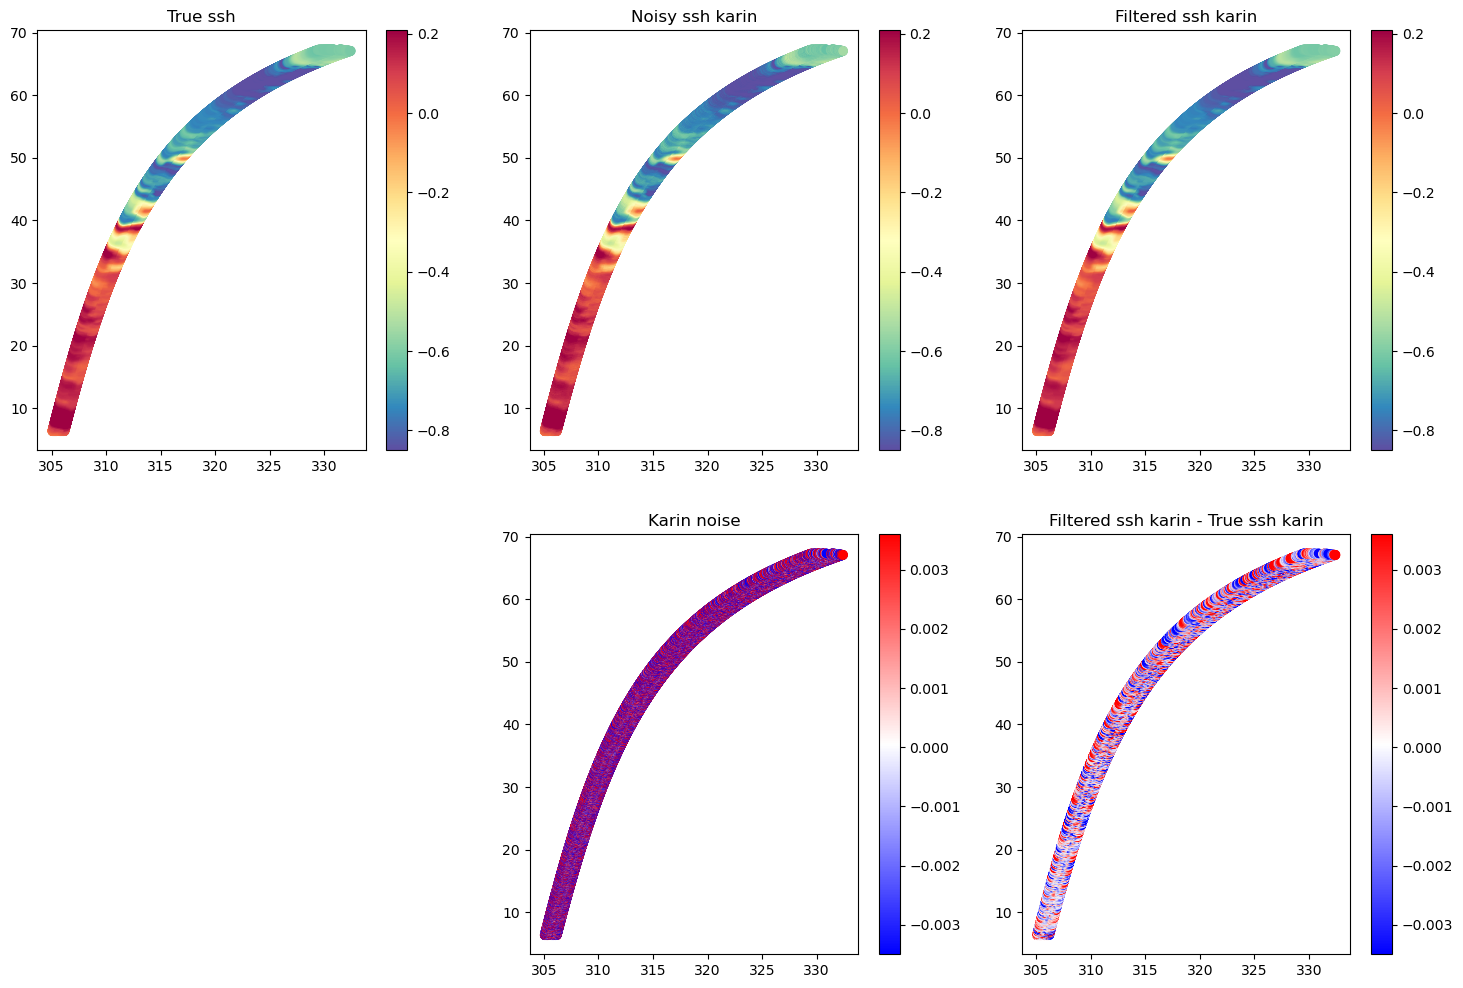

In [6]:
swt_filtered.plot_track('ssh_karin_filt',swt_input)

<div class="alert alert-info" role="alert">

<h2>3. Statistical & Spectral Analysis </h2>

</div>

## 3.1 Parameters

In [7]:

etuvar = 'ssh_karin_filt'
filter_name = 'CNN'
output_dir = '../results'
stat_output_filename = f'{output_dir}/stat_CNN.nc'
stat_by_regime_output_filename = f'{output_dir}/stat_by_regime_CNN.nc'
psd_output_filename = f'{output_dir}/psd_CNN.nc'
cnn_bench = Benchmark()


## 3.2 Compute grid boxes statistics

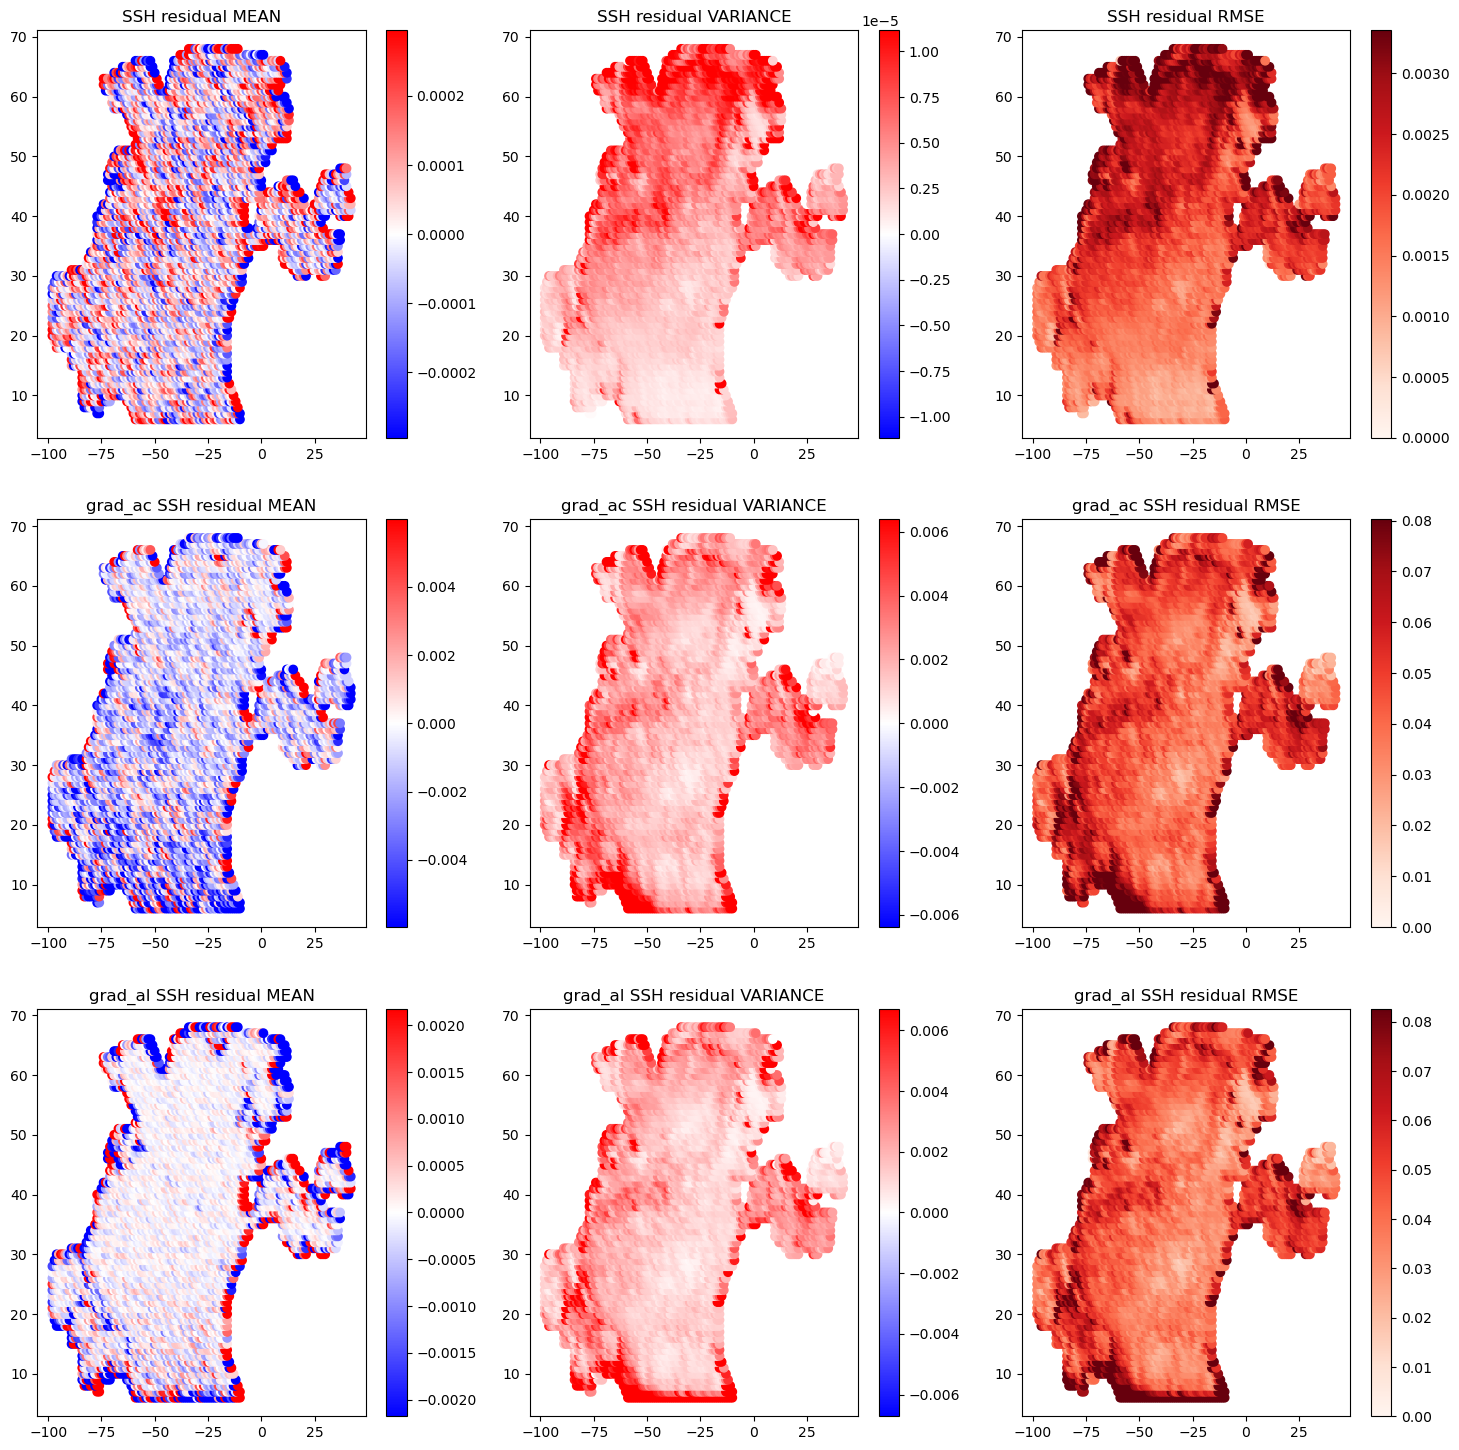

CPU times: user 1min 55s, sys: 2.13 s, total: 1min 57s
Wall time: 4min 6s


In [8]:
%%time
cnn_bench.compute_stats(list_of_file, etuvar,list_of_file_inputs)
cnn_bench.write_stats(stat_output_filename, filter=filter_name)
cnn_bench.plot_stats(stat_output_filename)

## 3.3 Compute statistics by regime (coastal, offshore low variability, offshore high variability)

CPU times: user 2min 50s, sys: 9.15 s, total: 2min 59s
Wall time: 6min 8s


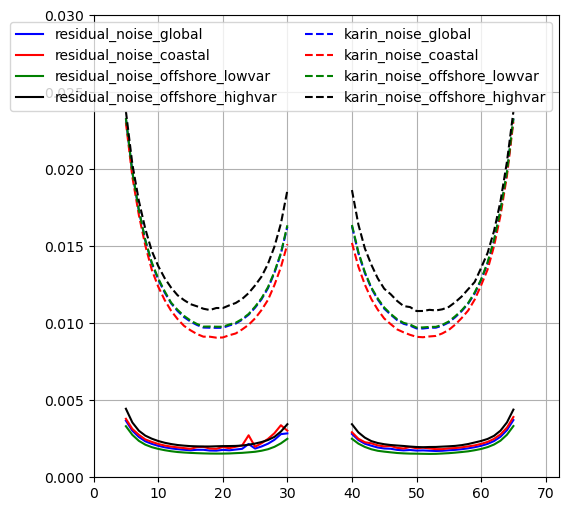

In [9]:
%%time 
# Compute stats by regime
cnn_bench.compute_stats_by_regime(list_of_file, etuvar, list_of_file_inputs)

# Write stats by regime
cnn_bench.write_stats_by_regime(stat_by_regime_output_filename, filter=filter_name) 

# Plot stats by regime
cnn_bench.plot_stats_by_regime(stat_by_regime_output_filename)

## 3.4 Compute Spectral scores

In [ ]:
%%time
cnn_bench.compute_along_track_psd(list_of_file, etuvar,list_of_file_inputs, lengh_scale=1000)
cnn_bench.write_along_track_psd(psd_output_filename, filter=filter_name)
cnn_bench.plot_psd(psd_output_filename)

<div class="alert alert-info" role="alert">

<h2>4. Leaderboard </h2>

</div>

In [ ]:
cnn_bench.summary('demo_benchmark_CNN.ipynb')